# Applied Data Science Capstone

## Capstone Project - The Battle of Neighborhoods

### Importing necessary libraries

In [39]:
# Library to handle requests
import requests

# Library for data analsysis
import pandas as pd

# Library to handle data in a vectorized manner
import numpy as np 

# Library for web scrapping
from bs4 import BeautifulSoup # Library for web scrapping  

import geocoder

# Module to convert an address into latitude and longitude values
from geopy.geocoders import Nominatim 

# Libraries for displaying images
from IPython.display import Image 
from IPython.core.display import HTML 

# Library for data visualization
from matplotlib import pyplot as plt
%matplotlib inline
import seaborn as sns
    
# Tranforming json file into a pandas dataframe library
from pandas.io.json import json_normalize

# Map rendering library
import folium 

print('Libraries are imported! You are ready to go -->')

Libraries are imported! You are ready to go -->


### Loading the London Crimes Dataset

Contains London Crime data from 2008 - 2016

Link to the dataset &#8594; https://www.kaggle.com/jboysen/london-crime

In [2]:
df = pd.read_csv("london_crime_data.csv")
df

,lsoa_code,borough,major_category,minor_category,value,year,month
0,E01001116,Croydon,Burglary,Burglary in Other Buildings,0,2016,11
1,E01001646,Greenwich,Violence Against the Person,Other violence,0,2016,11
2,E01000677,Bromley,Violence Against the Person,Other violence,0,2015,5
3,E01003774,Redbridge,Burglary,Burglary in Other Buildings,0,2016,3
4,E01004563,Wandsworth,Robbery,Personal Property,0,2008,6
...,...,...,...,...,...,...,...
13490599,E01000504,Brent,Criminal Damage,Criminal Damage To Dwelling,0,2015,2
13490600,E01002504,Hillingdon,Robbery,Personal Property,1,2015,6
13490601,E01004165,Sutton,Burglary,Burglary in a Dwelling,0,2011,2
13490602,E01001134,Croydon,Robbery,Business Property,0,2011,5


In [3]:
df = df.query('value != 0')

In [4]:
df.shape

(3419099, 7)

In [5]:
df = df.query('year == 2016')
df

,lsoa_code,borough,major_category,minor_category,value,year,month
9,E01004177,Sutton,Theft and Handling,Theft/Taking of Pedal Cycle,1,2016,8
32,E01000733,Bromley,Criminal Damage,Criminal Damage To Motor Vehicle,1,2016,4
64,E01003989,Southwark,Theft and Handling,Theft From Shops,4,2016,8
112,E01002276,Havering,Burglary,Burglary in a Dwelling,1,2016,8
224,E01003674,Redbridge,Drugs,Possession Of Drugs,2,2016,11
...,...,...,...,...,...,...,...
13490419,E01001661,Greenwich,Violence Against the Person,Assault with Injury,2,2016,1
13490439,E01002200,Harrow,Violence Against the Person,Common Assault,3,2016,3
13490458,E01001862,Hammersmith and Fulham,Theft and Handling,Theft/Taking Of Motor Vehicle,2,2016,4
13490469,E01003783,Redbridge,Drugs,Possession Of Drugs,5,2016,3


In [6]:
df.reset_index(drop = True, inplace = True)
df

,lsoa_code,borough,major_category,minor_category,value,year,month
0,E01004177,Sutton,Theft and Handling,Theft/Taking of Pedal Cycle,1,2016,8
1,E01000733,Bromley,Criminal Damage,Criminal Damage To Motor Vehicle,1,2016,4
2,E01003989,Southwark,Theft and Handling,Theft From Shops,4,2016,8
3,E01002276,Havering,Burglary,Burglary in a Dwelling,1,2016,8
4,E01003674,Redbridge,Drugs,Possession Of Drugs,2,2016,11
...,...,...,...,...,...,...,...
392037,E01001661,Greenwich,Violence Against the Person,Assault with Injury,2,2016,1
392038,E01002200,Harrow,Violence Against the Person,Common Assault,3,2016,3
392039,E01001862,Hammersmith and Fulham,Theft and Handling,Theft/Taking Of Motor Vehicle,2,2016,4
392040,E01003783,Redbridge,Drugs,Possession Of Drugs,5,2016,3


In [7]:
df.rename(columns = {'value' : 'no_of_crimes'}, inplace = True)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 392042 entries, 0 to 392041
Data columns (total 7 columns):
lsoa_code         392042 non-null object
borough           392042 non-null object
major_category    392042 non-null object
minor_category    392042 non-null object
no_of_crimes      392042 non-null int64
year              392042 non-null int64
month             392042 non-null int64
dtypes: int64(3), object(4)
memory usage: 20.9+ MB


In [9]:
df = pd.pivot_table(df, values = ['no_of_crimes'], index = ['borough'], columns = ['major_category'], aggfunc = np.sum, fill_value = 0)
df.head()

no_of_crimes                        \
major_category           Burglary Criminal Damage Drugs   
borough                                                   
Barking and Dagenham         1287            1949   919   
Barnet                       3402            2183   906   
Bexley                       1123            1673   646   
Brent                        2631            2280  2096   
Bromley                      2214            2202   728   

                                                                           \
major_category       Other Notifiable Offences Robbery Theft and Handling   
borough                                                                     
Barking and Dagenham                       378     534               5607   
Barnet                                     499     464               9731   
Bexley                                     294     209               4392   
Brent                                      536     919               9026   
Bromley                                    417     369               7584   

                                                  
major_category       Violence Against the Person  
borough                                           
Barking and Dagenham                        6067  
Barnet                                      7499  
Bexley                                      4503  
Brent                                       9205  
Bromley                                     6650

In [10]:
df.reset_index(inplace = True)

In [11]:
df['total_crime'] = df.sum(axis = 1)
df.head()

borough no_of_crimes                        \
major_category                           Burglary Criminal Damage Drugs   
0               Barking and Dagenham         1287            1949   919   
1                             Barnet         3402            2183   906   
2                             Bexley         1123            1673   646   
3                              Brent         2631            2280  2096   
4                            Bromley         2214            2202   728   

                                                                     \
major_category Other Notifiable Offences Robbery Theft and Handling   
0                                    378     534               5607   
1                                    499     464               9731   
2                                    294     209               4392   
3                                    536     919               9026   
4                                    417     369               7584   

                                           total_crime  
major_category Violence Against the Person              
0                                     6067       16741  
1                                     7499       24684  
2                                     4503       12840  
3                                     9205       26693  
4                                     6650       20164

In [12]:
df.columns = df.columns.map(' '.join)
df.head()

,borough,no_of_crimes Burglary,no_of_crimes Criminal Damage,no_of_crimes Drugs,no_of_crimes Other Notifiable Offences,no_of_crimes Robbery,no_of_crimes Theft and Handling,no_of_crimes Violence Against the Person,total_crime
0,Barking and Dagenham,1287,1949,919,378,534,5607,6067,16741
1,Barnet,3402,2183,906,499,464,9731,7499,24684
2,Bexley,1123,1673,646,294,209,4392,4503,12840
3,Brent,2631,2280,2096,536,919,9026,9205,26693
4,Bromley,2214,2202,728,417,369,7584,6650,20164


In [13]:
df.columns = ['Borough', 'Burglary', 'Criminal_damage', 'Drugs', 'Other_notifiable_offense', 'Robbery', 'Theft_and_handling', 'Violence_against_the_person', 'Total_crime']
df.head()

,Borough,Burglary,Criminal_damage,Drugs,Other_notifiable_offense,Robbery,Theft_and_handling,Violence_against_the_person,Total_crime
0,Barking and Dagenham,1287,1949,919,378,534,5607,6067,16741
1,Barnet,3402,2183,906,499,464,9731,7499,24684
2,Bexley,1123,1673,646,294,209,4392,4503,12840
3,Brent,2631,2280,2096,536,919,9026,9205,26693
4,Bromley,2214,2202,728,417,369,7584,6650,20164


In [14]:
url = 'https://en.wikipedia.org/wiki/List_of_London_boroughs'
raw_data = requests.get(url).text
soup = BeautifulSoup(raw_data, 'xml')
print(soup.prettify())

<?xml version="1.0" encoding="utf-8"?>
<!DOCTYPE html>
<html class="client-nojs" dir="ltr" lang="en">
 <head>
  <meta charset="UTF-8"/>
  <title>
   List of London boroughs - Wikipedia
  </title>
  <script>
   document.documentElement.className="client-js";RLCONF={"wgBreakFrames":!1,"wgSeparatorTransformTable":["",""],"wgDigitTransformTable":["",""],"wgDefaultDateFormat":"dmy","wgMonthNames":["","January","February","March","April","May","June","July","August","September","October","November","December"],"wgRequestId":"fcd1af2e-f872-455a-8f81-74140b6d78dd","wgCSPNonce":!1,"wgCanonicalNamespace":"","wgCanonicalSpecialPageName":!1,"wgNamespaceNumber":0,"wgPageName":"List_of_London_boroughs","wgTitle":"List of London boroughs","wgCurRevisionId":958873870,"wgRevisionId":958873870,"wgArticleId":28092685,"wgIsArticle":!0,"wgIsRedirect":!1,"wgAction":"view","wgUserName":null,"wgUserGroups":["*"],"wgCategories":["Use dmy dates from August 2015","Use British English from August 2015","Lists of 

In [15]:
london_table = pd.read_html(url)[0]
london_table

,Borough,Inner,Status,Local authority,Political control,Headquarters,Area (sq mi),Population (2013 est)[1],Co-ordinates,Nr. in map
0,Barking and Dagenham [note 1],NaN,NaN,Barking and Dagenham London Borough Council,Labour,"Town Hall, 1 Town Square",13.93,194352,51°33′39″N 0°09′21″E﻿ / ﻿51.5607°N 0.1557°E,25
1,Barnet,NaN,NaN,Barnet London Borough Council,Conservative,"Barnet House, 2 Bristol Avenue, Colindale",33.49,369088,51°37′31″N 0°09′06″W﻿ / ﻿51.6252°N 0.1517°W,31
2,Bexley,NaN,NaN,Bexley London Borough Council,Conservative,"Civic Offices, 2 Watling Street",23.38,236687,51°27′18″N 0°09′02″E﻿ / ﻿51.4549°N 0.1505°E,23
3,Brent,NaN,NaN,Brent London Borough Council,Labour,"Brent Civic Centre, Engineers Way",16.70,317264,51°33′32″N 0°16′54″W﻿ / ﻿51.5588°N 0.2817°W,12
4,Bromley,NaN,NaN,Bromley London Borough Council,Conservative,"Civic Centre, Stockwell Close",57.97,317899,51°24′14″N 0°01′11″E﻿ / ﻿51.4039°N 0.0198°E,20
5,Camden,NaN,NaN,Camden London Borough Council,Labour,"Camden Town Hall, Judd Street",8.40,229719,51°31′44″N 0°07′32″W﻿ / ﻿51.5290°N 0.1255°W,11
6,Croydon,NaN,NaN,Croydon London Borough Council,Labour,"Bernard Weatherill House, Mint Walk",33.41,372752,51°22′17″N 0°05′52″W﻿ / ﻿51.3714°N 0.0977°W,19
7,Ealing,NaN,NaN,Ealing London Borough Council,Labour,"Perceval House, 14-16 Uxbridge Road",21.44,342494,51°30′47″N 0°18′32″W﻿ / ﻿51.5130°N 0.3089°W,13
8,Enfield,NaN,NaN,Enfield London Borough Council,Labour,"Civic Centre, Silver Street",31.74,320524,51°39′14″N 0°04′48″W﻿ / ﻿51.6538°N 0.0799°W,30
9,Greenwich [note 2],[note 3],Royal,Greenwich London Borough Council,Labour,"Woolwich Town Hall, Wellington Street",18.28,264008,51°29′21″N 0°03′53″E﻿ / ﻿51.4892°N 0.0648°E,22


In [16]:
london_table.shape

(32, 10)

In [17]:
london_city = pd.read_html(url)[1]
london_city

,Borough,Inner,Status,Local authority,Political control,Headquarters,Area (sq mi),Population(2011 est),Co-ordinates,Nr. inmap
0,City of London,([note 5],Sui generis;City;Ceremonial county,Corporation of London;Inner Temple;Middle Temple,?,Guildhall,1.12,7000,51°30′56″N 0°05′32″W﻿ / ﻿51.5155°N 0.0922°W,1


In [58]:
london_table = london_table.append(london_city, ignore_index = True, sort = False)
london_table.tail()

,Borough,Inner,Status,Local authority,Political control,Headquarters,Area (sq mi),Population (2013 est)[1],Co-ordinates,Nr. in map,Population(2011 est),Nr. inmap
29,Waltham Forest,NaN,NaN,Waltham Forest London Borough Council,Labour,"Waltham Forest Town Hall, Forest Road",14.99,265797.0,51°35′27″N 0°00′48″W﻿ / ﻿51.5908°N 0.0134°W,28.0,NaN,NaN
30,Wandsworth,NaN,NaN,Wandsworth London Borough Council,Conservative,"The Town Hall, Wandsworth High Street",13.23,310516.0,51°27′24″N 0°11′28″W﻿ / ﻿51.4567°N 0.1910°W,5.0,NaN,NaN
31,Westminster,NaN,City,Westminster City Council,Conservative,"Westminster City Hall, 64 Victoria Street",8.29,226841.0,51°29′50″N 0°08′14″W﻿ / ﻿51.4973°N 0.1372°W,2.0,NaN,NaN
32,City of London,([],Sui generis;City;Ceremonial county,Corporation of London;Inner Temple;Middle Temple,?,Guildhall,1.12,NaN,51°30′56″N 0°05′32″W﻿ / ﻿51.5155°N 0.0922°W,NaN,7000.0,1.0
33,City of London,([note 5],Sui generis;City;Ceremonial county,Corporation of London;Inner Temple;Middle Temple,?,Guildhall,1.12,NaN,51°30′56″N 0°05′32″W﻿ / ﻿51.5155°N 0.0922°W,NaN,7000.0,1.0


In [19]:
london_table = london_table.replace('note 1', '', regex = True)
london_table = london_table.replace('note 2', '', regex = True)
london_table = london_table.replace('note 3', '', regex = True)
london_table = london_table.replace('note 4', '', regex = True)
london_table = london_table.replace('note 5', '', regex = True)
london_table

,Borough,Inner,Status,Local authority,Political control,Headquarters,Area (sq mi),Population (2013 est)[1],Co-ordinates,Nr. in map,Population(2011 est),Nr. inmap
0,Barking and Dagenham [],NaN,NaN,Barking and Dagenham London Borough Council,Labour,"Town Hall, 1 Town Square",13.93,194352.0,51°33′39″N 0°09′21″E﻿ / ﻿51.5607°N 0.1557°E,25.0,NaN,NaN
1,Barnet,NaN,NaN,Barnet London Borough Council,Conservative,"Barnet House, 2 Bristol Avenue, Colindale",33.49,369088.0,51°37′31″N 0°09′06″W﻿ / ﻿51.6252°N 0.1517°W,31.0,NaN,NaN
2,Bexley,NaN,NaN,Bexley London Borough Council,Conservative,"Civic Offices, 2 Watling Street",23.38,236687.0,51°27′18″N 0°09′02″E﻿ / ﻿51.4549°N 0.1505°E,23.0,NaN,NaN
3,Brent,NaN,NaN,Brent London Borough Council,Labour,"Brent Civic Centre, Engineers Way",16.70,317264.0,51°33′32″N 0°16′54″W﻿ / ﻿51.5588°N 0.2817°W,12.0,NaN,NaN
4,Bromley,NaN,NaN,Bromley London Borough Council,Conservative,"Civic Centre, Stockwell Close",57.97,317899.0,51°24′14″N 0°01′11″E﻿ / ﻿51.4039°N 0.0198°E,20.0,NaN,NaN
5,Camden,NaN,NaN,Camden London Borough Council,Labour,"Camden Town Hall, Judd Street",8.40,229719.0,51°31′44″N 0°07′32″W﻿ / ﻿51.5290°N 0.1255°W,11.0,NaN,NaN
6,Croydon,NaN,NaN,Croydon London Borough Council,Labour,"Bernard Weatherill House, Mint Walk",33.41,372752.0,51°22′17″N 0°05′52″W﻿ / ﻿51.3714°N 0.0977°W,19.0,NaN,NaN
7,Ealing,NaN,NaN,Ealing London Borough Council,Labour,"Perceval House, 14-16 Uxbridge Road",21.44,342494.0,51°30′47″N 0°18′32″W﻿ / ﻿51.5130°N 0.3089°W,13.0,NaN,NaN
8,Enfield,NaN,NaN,Enfield London Borough Council,Labour,"Civic Centre, Silver Street",31.74,320524.0,51°39′14″N 0°04′48″W﻿ / ﻿51.6538°N 0.0799°W,30.0,NaN,NaN
9,Greenwich [],[],Royal,Greenwich London Borough Council,Labour,"Woolwich Town Hall, Wellington Street",18.28,264008.0,51°29′21″N 0°03′53″E﻿ / ﻿51.4892°N 0.0648°E,22.0,NaN,NaN


In [20]:
set(df['Borough']) - set(london_table['Borough'])

{'Barking and Dagenham', 'Greenwich', 'Hammersmith and Fulham'}

In [26]:
london_table.iloc[0,0] = 'Barking and Dagenham'
london_table.iloc[9,0] = 'Greenwich'
london_table.iloc[11,0] = 'Hammersmith and Fulham'
london_table

,Borough,Inner,Status,Local authority,Political control,Headquarters,Area (sq mi),Population (2013 est)[1],Co-ordinates,Nr. in map,Population(2011 est),Nr. inmap
0,Barking and Dagenham,NaN,NaN,Barking and Dagenham London Borough Council,Labour,"Town Hall, 1 Town Square",13.93,194352.0,51°33′39″N 0°09′21″E﻿ / ﻿51.5607°N 0.1557°E,25.0,NaN,NaN
1,Barnet,NaN,NaN,Barnet London Borough Council,Conservative,"Barnet House, 2 Bristol Avenue, Colindale",33.49,369088.0,51°37′31″N 0°09′06″W﻿ / ﻿51.6252°N 0.1517°W,31.0,NaN,NaN
2,Bexley,NaN,NaN,Bexley London Borough Council,Conservative,"Civic Offices, 2 Watling Street",23.38,236687.0,51°27′18″N 0°09′02″E﻿ / ﻿51.4549°N 0.1505°E,23.0,NaN,NaN
3,Brent,NaN,NaN,Brent London Borough Council,Labour,"Brent Civic Centre, Engineers Way",16.70,317264.0,51°33′32″N 0°16′54″W﻿ / ﻿51.5588°N 0.2817°W,12.0,NaN,NaN
4,Bromley,NaN,NaN,Bromley London Borough Council,Conservative,"Civic Centre, Stockwell Close",57.97,317899.0,51°24′14″N 0°01′11″E﻿ / ﻿51.4039°N 0.0198°E,20.0,NaN,NaN
5,Camden,NaN,NaN,Camden London Borough Council,Labour,"Camden Town Hall, Judd Street",8.40,229719.0,51°31′44″N 0°07′32″W﻿ / ﻿51.5290°N 0.1255°W,11.0,NaN,NaN
6,Croydon,NaN,NaN,Croydon London Borough Council,Labour,"Bernard Weatherill House, Mint Walk",33.41,372752.0,51°22′17″N 0°05′52″W﻿ / ﻿51.3714°N 0.0977°W,19.0,NaN,NaN
7,Ealing,NaN,NaN,Ealing London Borough Council,Labour,"Perceval House, 14-16 Uxbridge Road",21.44,342494.0,51°30′47″N 0°18′32″W﻿ / ﻿51.5130°N 0.3089°W,13.0,NaN,NaN
8,Enfield,NaN,NaN,Enfield London Borough Council,Labour,"Civic Centre, Silver Street",31.74,320524.0,51°39′14″N 0°04′48″W﻿ / ﻿51.6538°N 0.0799°W,30.0,NaN,NaN
9,Greenwich,[],Royal,Greenwich London Borough Council,Labour,"Woolwich Town Hall, Wellington Street",18.28,264008.0,51°29′21″N 0°03′53″E﻿ / ﻿51.4892°N 0.0648°E,22.0,NaN,NaN


In [27]:
set(df['Borough']) - set(london_table['Borough'])

set()

In [57]:
london = pd.merge(df, london_table, on = 'Borough')
london.head()

,Borough,Burglary,Criminal_damage,Drugs,Other_notifiable_offense,Robbery,Theft_and_handling,Violence_against_the_person,Total_crime,Inner,Status,Local authority,Political control,Headquarters,Area (sq mi),Population (2013 est)[1],Co-ordinates,Nr. in map,Population(2011 est),Nr. inmap
0,Barking and Dagenham,1287,1949,919,378,534,5607,6067,16741,NaN,NaN,Barking and Dagenham London Borough Council,Labour,"Town Hall, 1 Town Square",13.93,194352.0,51°33′39″N 0°09′21″E﻿ / ﻿51.5607°N 0.1557°E,25.0,NaN,NaN
1,Barnet,3402,2183,906,499,464,9731,7499,24684,NaN,NaN,Barnet London Borough Council,Conservative,"Barnet House, 2 Bristol Avenue, Colindale",33.49,369088.0,51°37′31″N 0°09′06″W﻿ / ﻿51.6252°N 0.1517°W,31.0,NaN,NaN
2,Bexley,1123,1673,646,294,209,4392,4503,12840,NaN,NaN,Bexley London Borough Council,Conservative,"Civic Offices, 2 Watling Street",23.38,236687.0,51°27′18″N 0°09′02″E﻿ / ﻿51.4549°N 0.1505°E,23.0,NaN,NaN
3,Brent,2631,2280,2096,536,919,9026,9205,26693,NaN,NaN,Brent London Borough Council,Labour,"Brent Civic Centre, Engineers Way",16.70,317264.0,51°33′32″N 0°16′54″W﻿ / ﻿51.5588°N 0.2817°W,12.0,NaN,NaN
4,Bromley,2214,2202,728,417,369,7584,6650,20164,NaN,NaN,Bromley London Borough Council,Conservative,"Civic Centre, Stockwell Close",57.97,317899.0,51°24′14″N 0°01′11″E﻿ / ﻿51.4039°N 0.0198°E,20.0,NaN,NaN


In [56]:
london_desc = london.sort_values(['Total_crime'], axis = 0, ascending = False)
london_desc.head()

,Borough,Burglary,Criminal_damage,Drugs,Other_notifiable_offense,Robbery,Theft_and_handling,Violence_against_the_person,Total_crime,Inner,Status,Local authority,Political control,Headquarters,Area (sq mi),Population (2013 est)[1],Co-ordinates,Nr. in map,Population(2011 est),Nr. inmap
32,Westminster,3218,2179,2049,708,1822,27520,10834,48330,NaN,City,Westminster City Council,Conservative,"Westminster City Hall, 64 Victoria Street",8.29,226841.0,51°29′50″N 0°08′14″W﻿ / ﻿51.4973°N 0.1372°W,2.0,NaN,NaN
21,Lambeth,3087,2764,2738,635,1196,13155,10496,34071,NaN,NaN,Lambeth London Borough Council,Labour,"Lambeth Town Hall, Brixton Hill",10.36,314242.0,51°27′39″N 0°06′59″W﻿ / ﻿51.4607°N 0.1163°W,6.0,NaN,NaN
27,Southwark,2946,2621,1838,494,1317,12946,9474,31636,NaN,NaN,Southwark London Borough Council,Labour,160 Tooley Street,11.14,298464.0,51°30′13″N 0°04′49″W﻿ / ﻿51.5035°N 0.0804°W,7.0,NaN,NaN
24,Newham,2115,2496,1684,713,1472,11964,9646,30090,[],NaN,Newham London Borough Council,Labour,"Newham Dockside, 1000 Dockside Road",13.98,318227.0,51°30′28″N 0°02′49″E﻿ / ﻿51.5077°N 0.0469°E,27.0,NaN,NaN
29,Tower Hamlets,2794,2357,1629,678,1234,10953,9608,29253,NaN,NaN,Tower Hamlets London Borough Council,Labour,"Town Hall, Mulberry Place, 5 Clove Crescent",7.63,272890.0,51°30′36″N 0°00′21″W﻿ / ﻿51.5099°N 0.0059°W,8.0,NaN,NaN


In [34]:
london_high_crime_plot = london_desc.head(5)
london_high_crime_plot

,Borough,Burglary,Criminal_damage,Drugs,Other_notifiable_offense,Robbery,Theft_and_handling,Violence_against_the_person,Total_crime,Inner,Status,Local authority,Political control,Headquarters,Area (sq mi),Population (2013 est)[1],Co-ordinates,Nr. in map,Population(2011 est),Nr. inmap
32,Westminster,3218,2179,2049,708,1822,27520,10834,48330,NaN,City,Westminster City Council,Conservative,"Westminster City Hall, 64 Victoria Street",8.29,226841.0,51°29′50″N 0°08′14″W﻿ / ﻿51.4973°N 0.1372°W,2.0,NaN,NaN
21,Lambeth,3087,2764,2738,635,1196,13155,10496,34071,NaN,NaN,Lambeth London Borough Council,Labour,"Lambeth Town Hall, Brixton Hill",10.36,314242.0,51°27′39″N 0°06′59″W﻿ / ﻿51.4607°N 0.1163°W,6.0,NaN,NaN
27,Southwark,2946,2621,1838,494,1317,12946,9474,31636,NaN,NaN,Southwark London Borough Council,Labour,160 Tooley Street,11.14,298464.0,51°30′13″N 0°04′49″W﻿ / ﻿51.5035°N 0.0804°W,7.0,NaN,NaN
24,Newham,2115,2496,1684,713,1472,11964,9646,30090,[],NaN,Newham London Borough Council,Labour,"Newham Dockside, 1000 Dockside Road",13.98,318227.0,51°30′28″N 0°02′49″E﻿ / ﻿51.5077°N 0.0469°E,27.0,NaN,NaN
29,Tower Hamlets,2794,2357,1629,678,1234,10953,9608,29253,NaN,NaN,Tower Hamlets London Borough Council,Labour,"Town Hall, Mulberry Place, 5 Clove Crescent",7.63,272890.0,51°30′36″N 0°00′21″W﻿ / ﻿51.5099°N 0.0059°W,8.0,NaN,NaN


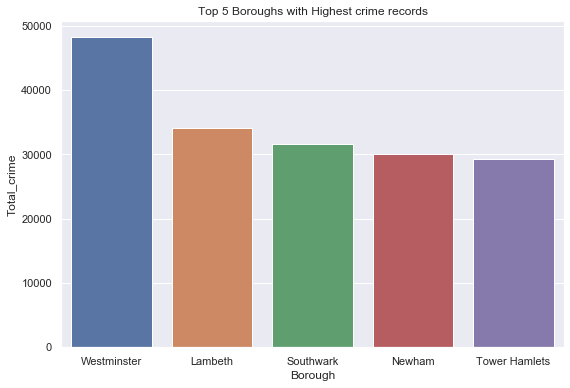

In [54]:
sns.set(style = 'darkgrid')
plt.figure(figsize = (9,6))
sns.barplot(x = 'Borough', y = 'Total_crime', data = london_high_crime_plot)
plt.title('Top 5 Boroughs with Highest crime records');

In [55]:
london_asc = london.sort_values(['Total_crime'], axis = 0, ascending = True)
london_asc.head()

,Borough,Burglary,Criminal_damage,Drugs,Other_notifiable_offense,Robbery,Theft_and_handling,Violence_against_the_person,Total_crime,Inner,Status,Local authority,Political control,Headquarters,Area (sq mi),Population (2013 est)[1],Co-ordinates,Nr. in map,Population(2011 est),Nr. inmap
6,City of London,2,2,10,6,4,129,25,178,([],Sui generis;City;Ceremonial county,Corporation of London;Inner Temple;Middle Temple,?,Guildhall,1.12,NaN,51°30′56″N 0°05′32″W﻿ / ﻿51.5155°N 0.0922°W,NaN,7000.0,1.0
20,Kingston upon Thames,879,1054,743,189,121,3803,3194,9983,NaN,Royal,Kingston upon Thames London Borough Council,Liberal Democrat,"Guildhall, High Street",14.38,166793.0,51°24′31″N 0°18′23″W﻿ / ﻿51.4085°N 0.3064°W,16.0,NaN,NaN
28,Sutton,1233,1316,461,253,165,3516,3714,10658,NaN,NaN,Sutton London Borough Council,Liberal Democrat,"Civic Offices, St Nicholas Way",16.93,195914.0,51°21′42″N 0°11′40″W﻿ / ﻿51.3618°N 0.1945°W,18.0,NaN,NaN
26,Richmond upon Thames,1359,1148,320,217,106,4769,3155,11074,NaN,NaN,Richmond upon Thames London Borough Council,Liberal Democrat,"Civic Centre, 44 York Street",22.17,191365.0,51°26′52″N 0°19′34″W﻿ / ﻿51.4479°N 0.3260°W,15.0,NaN,NaN
23,Merton,1419,1418,466,249,283,4894,4026,12755,NaN,NaN,Merton London Borough Council,Labour,"Civic Centre, London Road",14.52,203223.0,51°24′05″N 0°11′45″W﻿ / ﻿51.4014°N 0.1958°W,17.0,NaN,NaN


In [42]:
london_low_crime_plot = london_asc.head(5)
london_low_crime_plot

,Borough,Burglary,Criminal_damage,Drugs,Other_notifiable_offense,Robbery,Theft_and_handling,Violence_against_the_person,Total_crime,Inner,Status,Local authority,Political control,Headquarters,Area (sq mi),Population (2013 est)[1],Co-ordinates,Nr. in map,Population(2011 est),Nr. inmap
6,City of London,2,2,10,6,4,129,25,178,([],Sui generis;City;Ceremonial county,Corporation of London;Inner Temple;Middle Temple,?,Guildhall,1.12,NaN,51°30′56″N 0°05′32″W﻿ / ﻿51.5155°N 0.0922°W,NaN,7000.0,1.0
20,Kingston upon Thames,879,1054,743,189,121,3803,3194,9983,NaN,Royal,Kingston upon Thames London Borough Council,Liberal Democrat,"Guildhall, High Street",14.38,166793.0,51°24′31″N 0°18′23″W﻿ / ﻿51.4085°N 0.3064°W,16.0,NaN,NaN
28,Sutton,1233,1316,461,253,165,3516,3714,10658,NaN,NaN,Sutton London Borough Council,Liberal Democrat,"Civic Offices, St Nicholas Way",16.93,195914.0,51°21′42″N 0°11′40″W﻿ / ﻿51.3618°N 0.1945°W,18.0,NaN,NaN
26,Richmond upon Thames,1359,1148,320,217,106,4769,3155,11074,NaN,NaN,Richmond upon Thames London Borough Council,Liberal Democrat,"Civic Centre, 44 York Street",22.17,191365.0,51°26′52″N 0°19′34″W﻿ / ﻿51.4479°N 0.3260°W,15.0,NaN,NaN
23,Merton,1419,1418,466,249,283,4894,4026,12755,NaN,NaN,Merton London Borough Council,Labour,"Civic Centre, London Road",14.52,203223.0,51°24′05″N 0°11′45″W﻿ / ﻿51.4014°N 0.1958°W,17.0,NaN,NaN


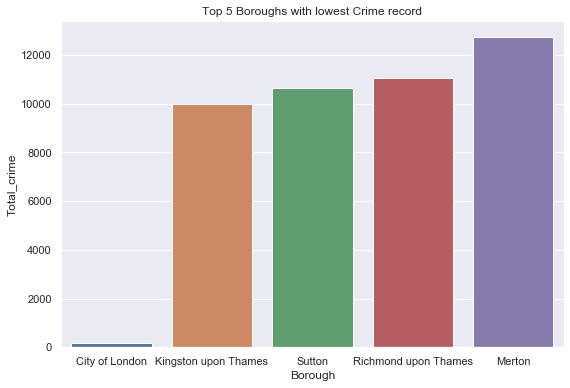

In [52]:
sns.set(style = 'darkgrid')
plt.figure(figsize = (9,6))
sns.barplot(x = 'Borough', y = 'Total_crime', data = london_low_crime_plot)
plt.title('Top 5 Boroughs with lowest Crime record');